# Data Preparation

## Import Library

In [1]:
from pandas import DataFrame
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
import numpy as np

# Visualization
from matplotlib import pyplot as plt
%matplotlib inline
from seaborn import pairplot
from seaborn import heatmap
from seaborn import boxplot

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


## Data Loading

In [2]:
dataset_path = "./updated_pollution_dataset.csv"
air_df = read_csv(dataset_path)
air_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# Exploratory Data Analysis (EDA)

## Create new dataframe for analysis

In [3]:
df = air_df.copy()
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


## Show General Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


## Describe Dataset

In [6]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


## Missing Value

In [7]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

## Target Unique Values

In [8]:
df["Air Quality"].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [8]:
df["Air Quality"].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

## Outliers

In [18]:
features = ["Temperature", "Humidity", "PM2.5", "PM10", "NO2","SO2", "CO", "Proximity_to_Industrial_Areas", "Population_Density"]
target = ["Air Quality"]

<Axes: xlabel='Population_Density'>

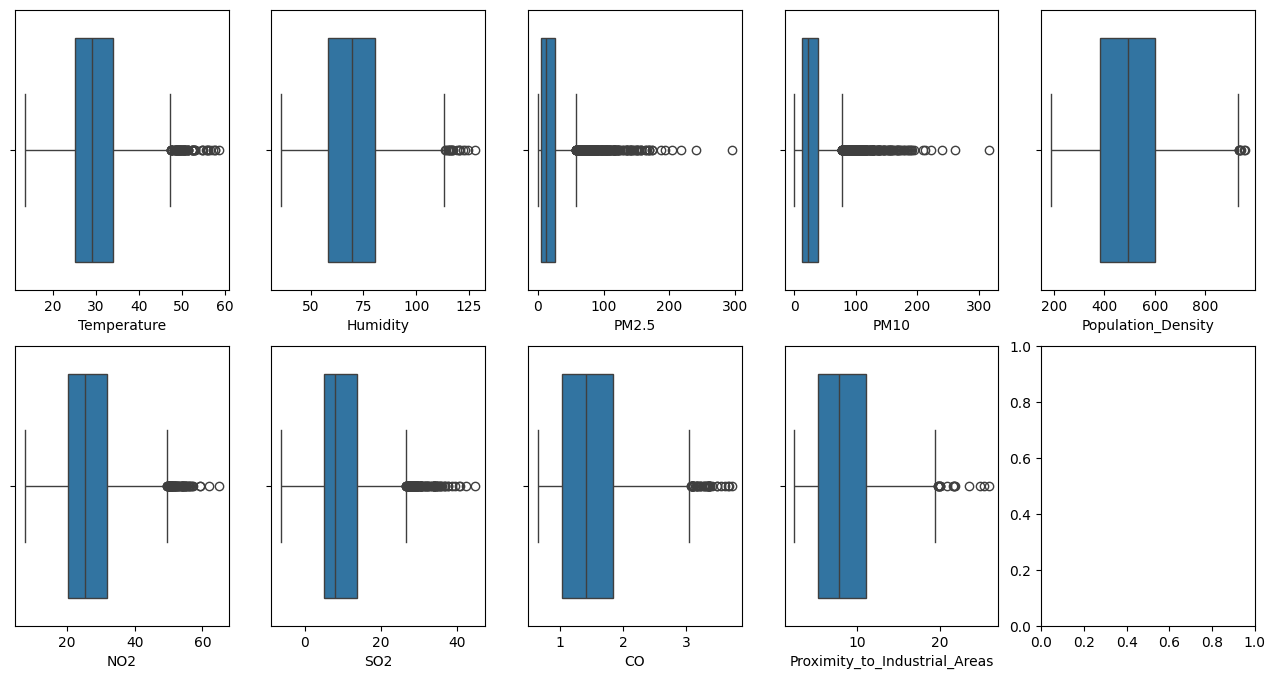

In [10]:
fig, axs = plt.subplots(2, 5)
fig.set_figwidth(16)
fig.set_figheight(8)
boxplot(x=df[features[0]], ax=axs[0, 0])
boxplot(x=df[features[1]], ax=axs[0, 1])
boxplot(x=df[features[2]], ax=axs[0, 2])
boxplot(x=df[features[3]], ax=axs[0, 3])
boxplot(x=df[features[4]], ax=axs[1, 0])
boxplot(x=df[features[5]], ax=axs[1, 1])
boxplot(x=df[features[6]], ax=axs[1, 2])
boxplot(x=df[features[7]], ax=axs[1, 3])
boxplot(x=df[features[8]], ax=axs[0, 4])

In [ ]:
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[features]<(Q1-1.5*IQR))|(df[features]>(Q3+1.5*IQR))).any(axis=1)]

<Axes: xlabel='Population_Density'>

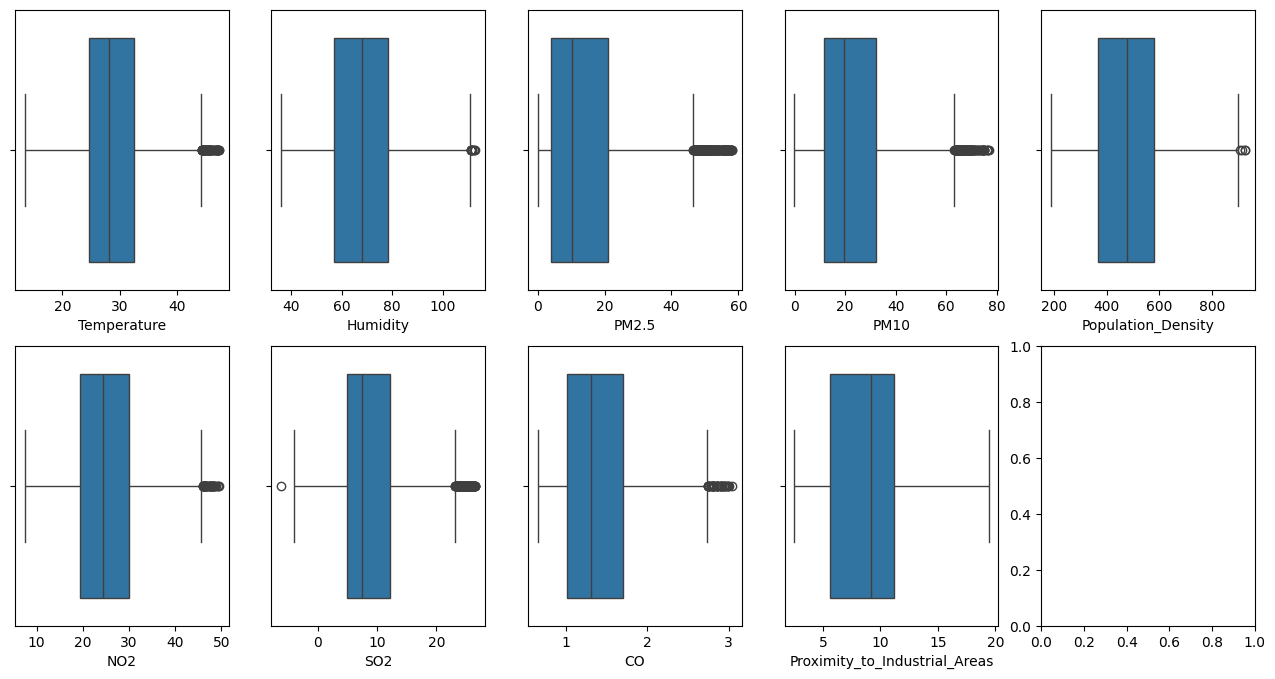

In [12]:
fig, axs = plt.subplots(2, 5)
fig.set_figwidth(16)
fig.set_figheight(8)
boxplot(x=df[features[0]], ax=axs[0, 0])
boxplot(x=df[features[1]], ax=axs[0, 1])
boxplot(x=df[features[2]], ax=axs[0, 2])
boxplot(x=df[features[3]], ax=axs[0, 3])
boxplot(x=df[features[4]], ax=axs[1, 0])
boxplot(x=df[features[5]], ax=axs[1, 1])
boxplot(x=df[features[6]], ax=axs[1, 2])
boxplot(x=df[features[7]], ax=axs[1, 3])
boxplot(x=df[features[8]], ax=axs[0, 4])

## Multivariate Analysis

### change target value to numerical

In [13]:
# set_option('future.no_silent_downcasting', True)              # save function with .infer_objects(copy=False)
df["Air Quality"] = df["Air Quality"].replace({'Good': 1, 'Moderate': 2, 'Poor': 3, 'Hazardous': 4}).infer_objects(copy=False)
df.head()

/tmp/ipykernel_2642/3994601839.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Air Quality"] = df["Air Quality"].replace({'Good': 1, 'Moderate': 2, 'Poor': 3, 'Hazardous': 4}).infer_objects(copy=False)


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1


### Pairplot

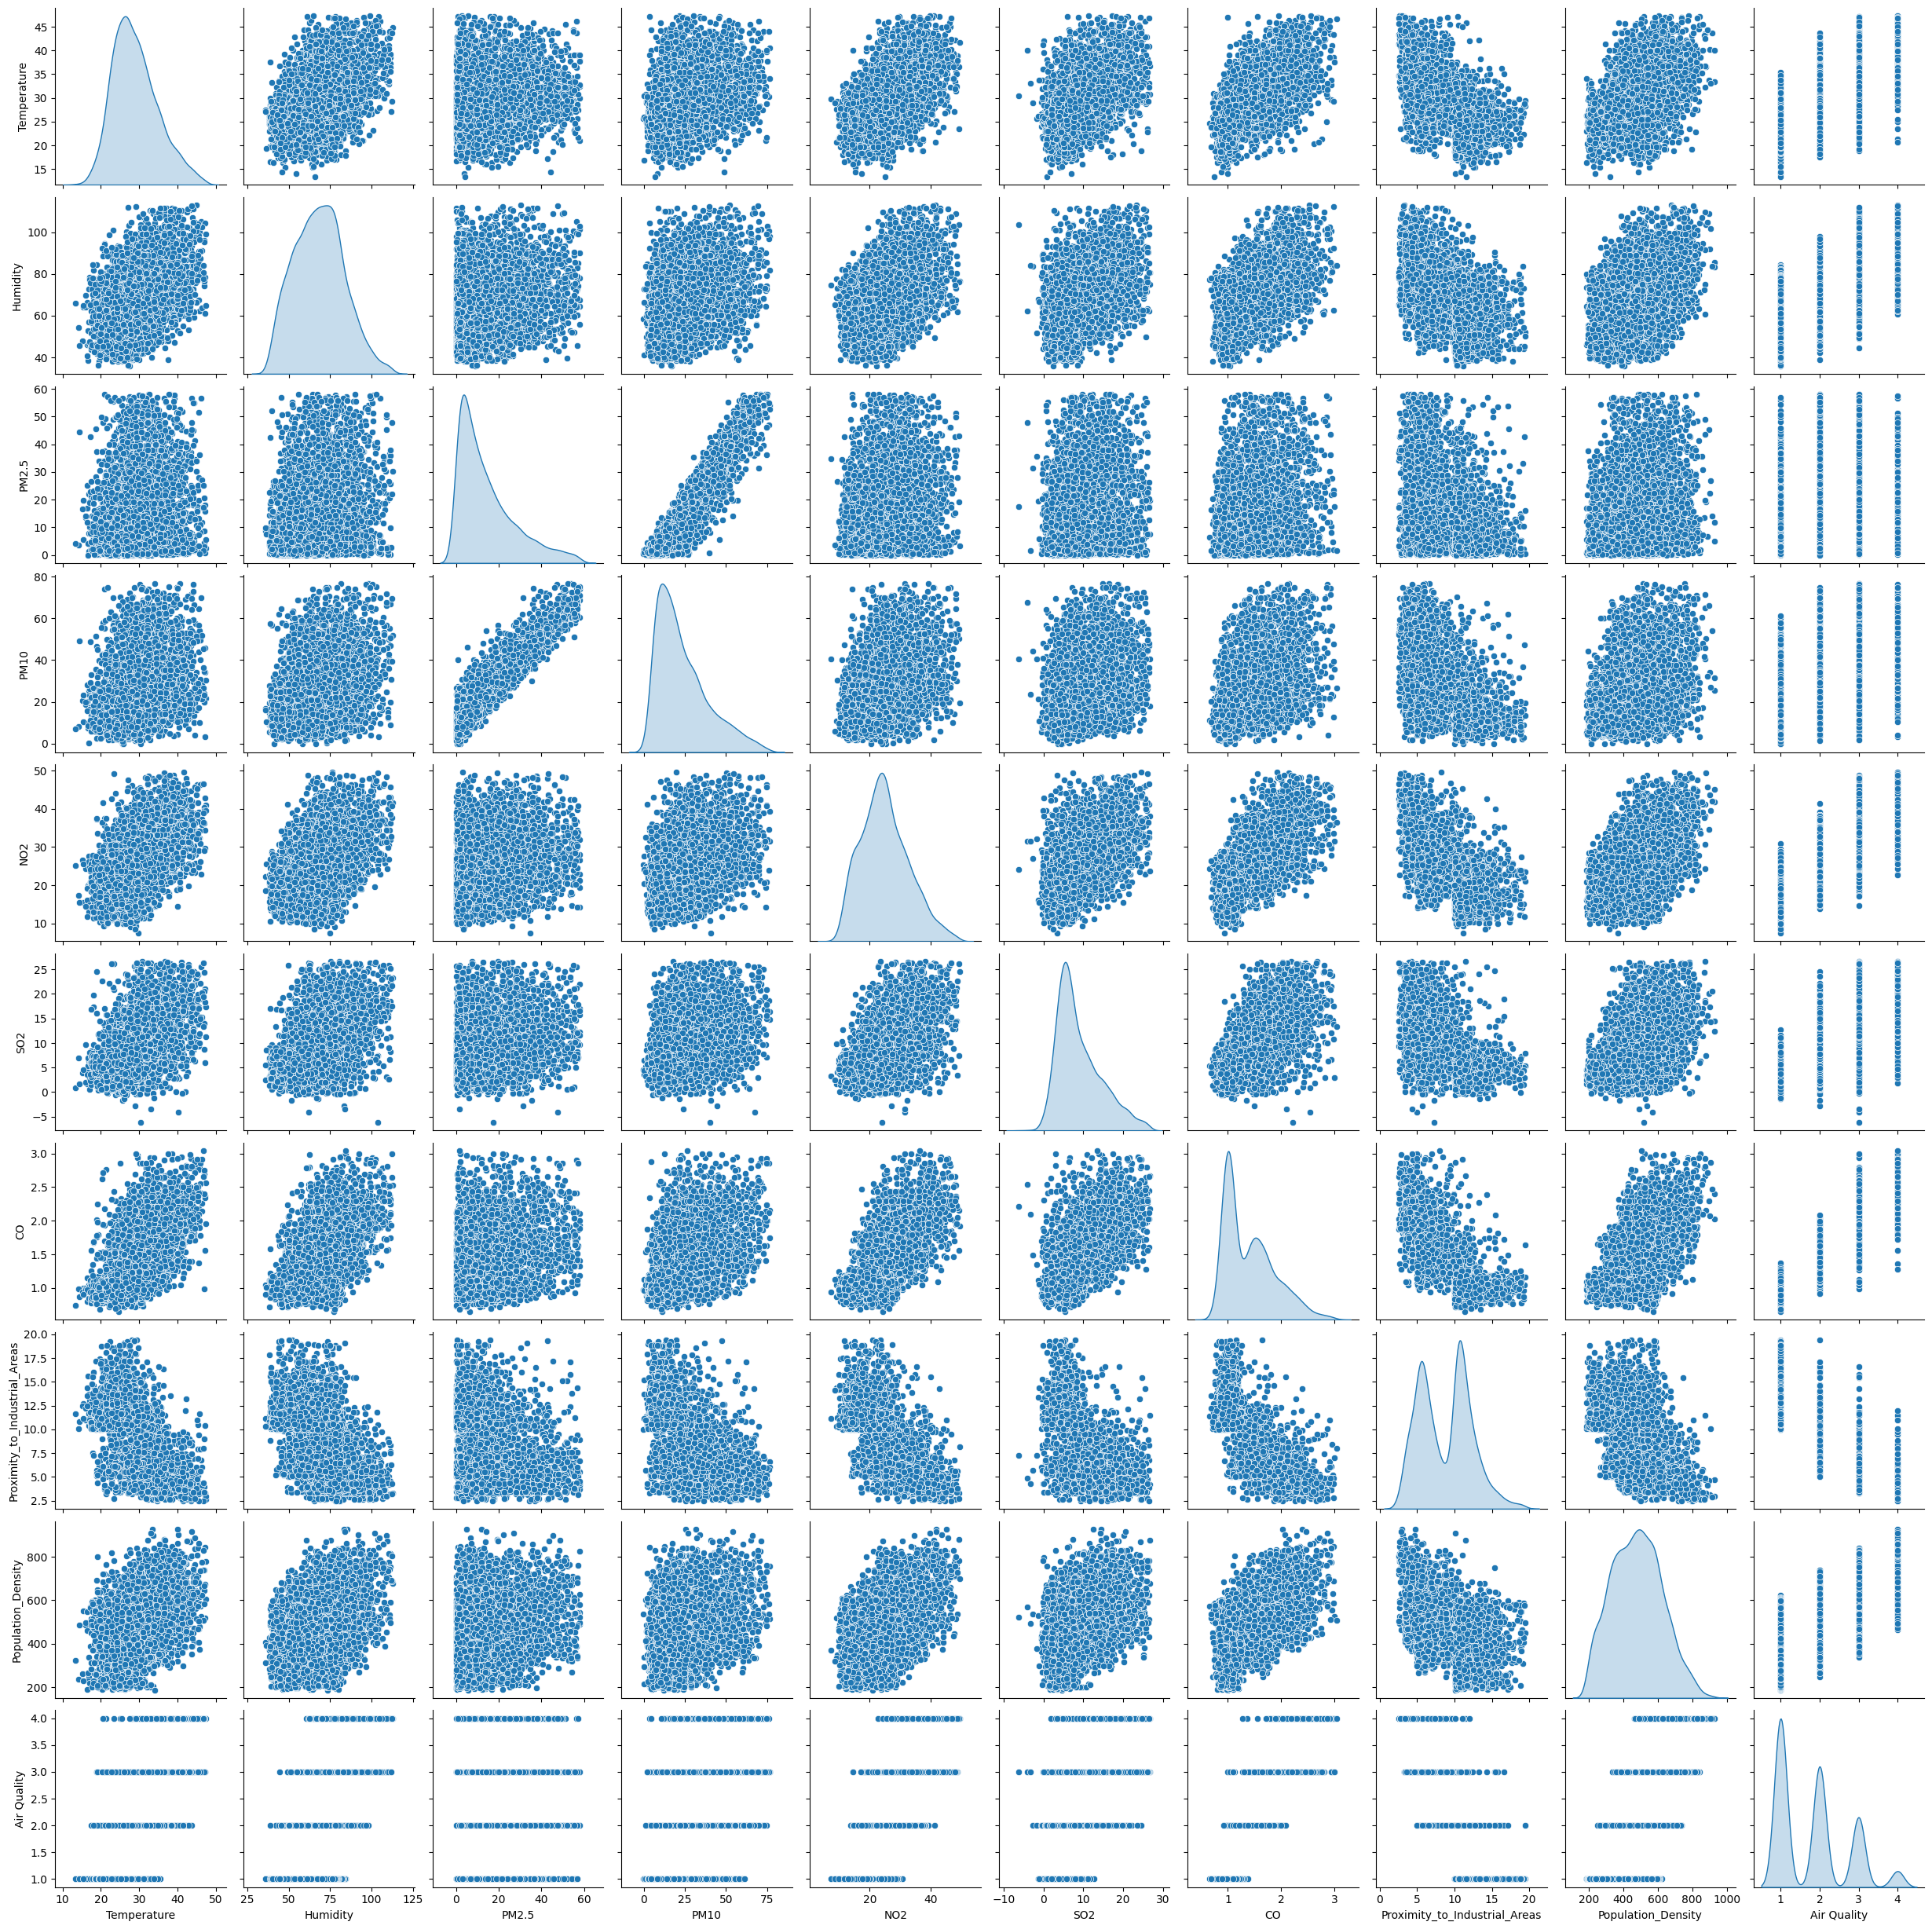

In [14]:
pairplot(df, diag_kind='kde')

### Heatmap

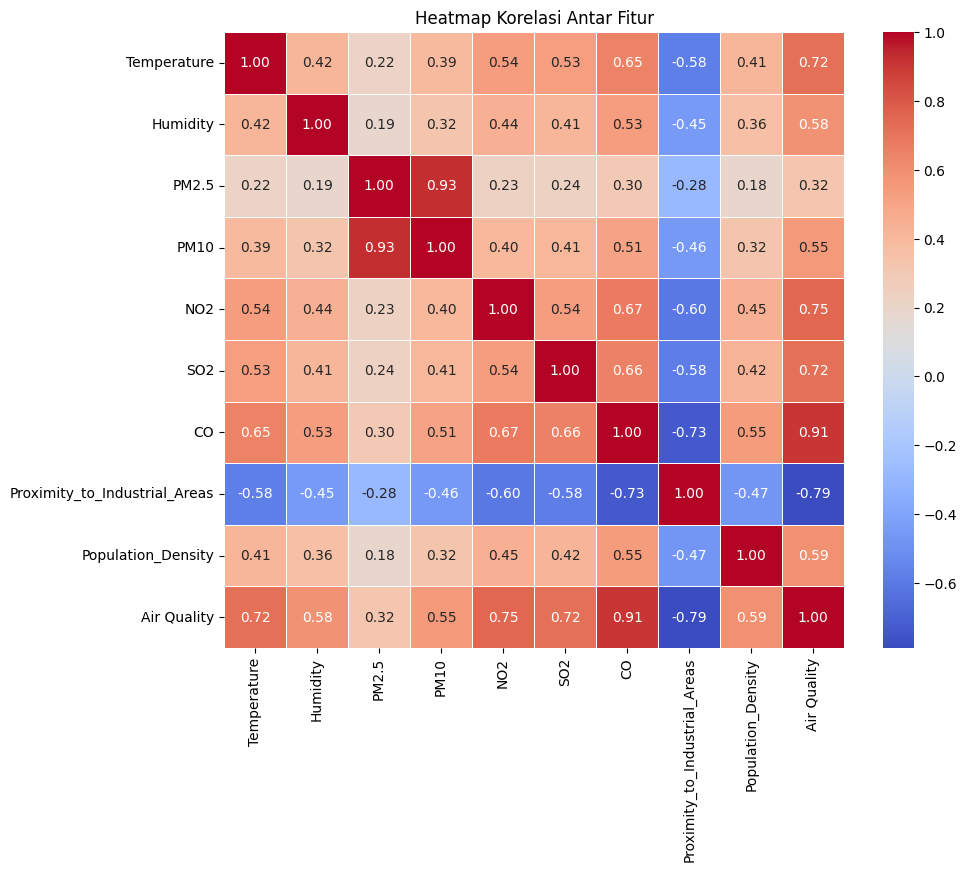

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

## Splitting Data

In [9]:
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standarisasi

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

DataFrame(X_train, columns=features).head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,1.297111,1.412047,-0.481782,-0.052662,0.721268,-0.255428,1.278238,-1.254684,1.306184
1,-0.556493,-1.006794,-0.777373,-0.724820,-0.147346,-0.825111,-1.014243,0.458346,-1.193520
2,1.059850,2.596271,-0.805335,-0.778737,0.619742,1.273722,1.148824,-0.204762,1.666089
3,-1.861430,-0.811523,-0.465804,-0.606204,-0.090942,-1.034994,-0.866341,0.872789,0.043244
4,-0.497177,-0.962700,-0.581644,-0.688876,-1.196451,-0.825111,-0.459610,0.928048,0.435868


# Modelling

In [20]:
models_acc = DataFrame(index=['accuracy', 'precision', 'recall', 'f1-score'], columns=['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN'])
models_acc.head()

,Logistic Regression,Random Forest,Gradient Boosting,SVM,KNN
accuracy,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN
f1-score,NaN,NaN,NaN,NaN,NaN


## 1. Logistic Regression

In [21]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
print(classification_report(y_test, y_pred))

logReg_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "Logistic Regression"] = logReg_report["accuracy"]
models_acc.loc["precision", "Logistic Regression"] = logReg_report["macro avg"]["precision"]
models_acc.loc["recall", "Logistic Regression"] = logReg_report["macro avg"]["recall"]
models_acc.loc["f1-score", "Logistic Regression"] = logReg_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.92      0.80      0.86       111
    Moderate       0.96      0.96      0.96       294
        Poor       0.83      0.89      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.95      0.95      0.95      1000



## 2. Random Forest

In [22]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)


y_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Akurasi model Random Forest : {accuracy:.2f}%")
print(classification_report(y_test, y_pred))

RF_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "Random Forest"] = RF_report["accuracy"]
models_acc.loc["precision", "Random Forest"] = RF_report["macro avg"]["precision"]
models_acc.loc["recall", "Random Forest"] = RF_report["macro avg"]["recall"]
models_acc.loc["f1-score", "Random Forest"] = RF_report["macro avg"]["f1-score"]

Akurasi model Random Forest : 96.00%
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.94      0.87      0.91       111
    Moderate       0.96      0.97      0.97       294
        Poor       0.88      0.91      0.89       186

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



## 3. Gradient Boosting

In [23]:
GB = GradientBoostingClassifier(random_state=42)
GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)
print(classification_report(y_test, y_pred))

GB_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "Gradient Boosting"] = GB_report["accuracy"]
models_acc.loc["precision", "Gradient Boosting"] = GB_report["macro avg"]["precision"]
models_acc.loc["recall", "Gradient Boosting"] = GB_report["macro avg"]["recall"]
models_acc.loc["f1-score", "Gradient Boosting"] = GB_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       409
   Hazardous       0.94      0.84      0.89       111
    Moderate       0.97      0.96      0.96       294
        Poor       0.87      0.91      0.89       186

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.96      0.95      0.95      1000



## 4. Support Vector Machine

In [24]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

svm_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "SVM"] = svm_report["accuracy"]
models_acc.loc["precision", "SVM"] = svm_report["macro avg"]["precision"]
models_acc.loc["recall", "SVM"] = svm_report["macro avg"]["recall"]
models_acc.loc["f1-score", "SVM"] = svm_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.93      0.79      0.85       111
    Moderate       0.95      0.96      0.96       294
        Poor       0.83      0.89      0.86       186

    accuracy                           0.94      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.95      0.94      0.94      1000



## 5. K-Nearest Neighbors

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

knn_report = classification_report(y_test, y_pred, output_dict=True)
models_acc.loc["accuracy", "KNN"] = knn_report["accuracy"]
models_acc.loc["precision", "KNN"] = knn_report["macro avg"]["precision"]
models_acc.loc["recall", "KNN"] = knn_report["macro avg"]["recall"]
models_acc.loc["f1-score", "KNN"] = knn_report["macro avg"]["f1-score"]

              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       409
   Hazardous       0.94      0.68      0.79       111
    Moderate       0.93      0.95      0.94       294
        Poor       0.77      0.86      0.81       186

    accuracy                           0.92      1000
   macro avg       0.91      0.87      0.88      1000
weighted avg       0.93      0.92      0.92      1000



# Evaluasi

In [26]:
models_acc

,Logistic Regression,Random Forest,Gradient Boosting,SVM,KNN
accuracy,0.946,0.96,0.955,0.945,0.923
precision,0.926735,0.946198,0.941332,0.927081,0.907825
recall,0.912871,0.937966,0.9286,0.910619,0.872619
f1-score,0.918617,0.941706,0.934084,0.917303,0.884664


In [121]:
models_acc.loc["accuracy"]

Logistic Regression    0.946
Random Forest           0.96
Gradient Boosting      0.955
SVM                    0.945
KNN                    0.923
Name: accuracy, dtype: object

## Random Forest Optimization

In [148]:
RF_models = RandomForestClassifier(random_state=42, n_jobs=-1)

search_space = {
    "n_estimators": [200, 400, 600],
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_depth": [10, 20, 30, None],
    "bootstrap": [True, False],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator= RF_models,
    param_grid= search_space,
    verbose=4,
    cv=2
)

RF_model = grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 648 candidates, totalling 1296 fits
[CV 1/2] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.948 total time=   0.8s
[CV 2/2] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.951 total time=   0.8s
[CV 1/2] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.951 total time=   1.5s
[CV 2/2] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.954 total time=   1.0s
[CV 1/2] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=0.950 total time=   2.3s
[CV 2/2] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=0.954 total time=   2.3s
[CV 1/2] END bootstrap=True, criteri

Print model accuracy and classification report

In [149]:
RF_model = grid_search.best_estimator_
y_pred = RF_model.predict(X_test)

print("Aktual   :", np.array(y_test)[:10])
print("Prediksi :", y_pred[:10])

# akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nAkurasi model SVM : {accuracy:.2f}%")

print("\n", classification_report(y_test, y_pred))

Aktual   : ['Hazardous' 'Good' 'Moderate' 'Hazardous' 'Good' 'Hazardous' 'Good'
 'Good' 'Good' 'Moderate']
Prediksi : ['Hazardous' 'Good' 'Moderate' 'Hazardous' 'Good' 'Hazardous' 'Good'
 'Good' 'Good' 'Moderate']

Akurasi model SVM : 96.00%

               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.96      0.86      0.91       111
    Moderate       0.96      0.97      0.96       294
        Poor       0.87      0.92      0.90       186

    accuracy                           0.96      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000



Print best parameter

In [ ]:
RF_model

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600, n_jobs=-1,
                       random_state=42)

## Gradient Boosting Optimization

In [38]:
GB_models = GB = GradientBoostingClassifier(random_state=42)

# search_space_GB = {
#     "learning_rate": [0.1, 0.01, 0.001],
#     "n_estimators": [100, 200, 300],
#     "criterion": ['friedman_mse', 'squared_error'],
#     "subsample": [0.5, 1.0],
#     "max_depth": [3, 6]
# }
search_space_GB = {
    "learning_rate": [0.3, 0.5, 0.7],
    "n_estimators": [300],
    "criterion": ['friedman_mse'],
    "subsample": [0.3, 0.5],
    "max_depth": [6, 9]
}

grid_search_GB = GridSearchCV(
    estimator= GB_models,
    param_grid= search_space_GB,
    cv=2, verbose=4
)

GB_model = grid_search_GB.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END criterion=friedman_mse, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.3;, score=0.404 total time=   3.8s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.3;, score=0.365 total time=   4.1s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5;, score=0.953 total time=   4.5s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5;, score=0.959 total time=   4.0s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=0.3;, score=0.454 total time=   5.8s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=0.3;, score=0.385 total time=   4.8s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.3, max_depth=9, n_estimators=300, subsample=0.5;, score=0.953 total time=   4.4s
[

In [39]:
GB_score = grid_search_GB.best_score_
GB_param = grid_search_GB.best_params_
GB_score

0.9563128580101893

In [ ]:
GB_model = grid_search_GB.best_estimator_
GB_score = grid_search_GB.best_score_
GB_param = grid_search_GB.best_params_

y_pred = GB_model.predict(X_test)

print("Aktual   :", np.array(y_test)[:10])
print("Prediksi :", y_pred[:10])

# akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nAkurasi model Gradient Boosting : {accuracy:.2f}%")

print("\n", classification_report(y_test, y_pred))

Aktual   : [1 2 3 2 2 1 3 1 1 2]
Prediksi : [1 2 3 2 2 1 3 1 1 3]

Akurasi model Gradient Boosting : 93.65%

               precision    recall  f1-score   support

           1       0.99      1.00      0.99       419
           2       0.98      0.89      0.93       275
           3       0.80      0.88      0.84       150
           4       0.69      0.82      0.75        38

    accuracy                           0.94       882
   macro avg       0.87      0.90      0.88       882
weighted avg       0.94      0.94      0.94       882

